### Loss Functions and Backpropagation

### Loss Functions and Backpropagation

#### Loss Functions

Loss functions quantify the difference between the predicted output of a model and the actual target value. They guide the training process by providing a metric to minimise during optimisation.

**Role in Neural Networks:**
- **Error Measurement:** Evaluate how well the model's predictions match the true values.
- **Feedback for Optimization:** Provide feedback to the optimisation algorithm, indicating how the model parameters should be adjusted.

**Common Types of Loss Functions:**
- **Mean Squared Error (MSE):** Used for regression tasks. Measures the average squared difference between predicted and actual values.
- **Cross Entropy Loss:** Used for classification tasks. Measures the difference between the predicted probability distribution and the true distribution.

---

#### Introduction to Backpropagation

Backpropagation is the process of computing gradients for each weight and bias in a neural network, enabling optimisation algorithms (like gradient descent) to minimize the loss function.

**Steps in Backpropagation:**
1. **Forward Pass:** Compute the output and loss for the current weights by passing the input through the network.
2. **Backward Pass:** Calculate the gradient of the loss with respect to each parameter using the chain rule.
3. **Weight Update:** Use the computed gradients to update the parameters (weights and biases), typically with an optiisation algorithm such as stochastic gradient descent (SGD).

Backpropagation allows neural networks to learn from data by iteratively reducing the loss, improving the model's performance over time.


In [14]:
import numpy as np

MSE Loss

In [ ]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


# binary cross entropy loss
def binary_cross_entropy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# Example data
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.9, 0.2, 0.8, 0.7])

# calculate loss
mse = mse_loss(y_true, y_pred)
bce = binary_cross_entropy_loss(y_true, y_pred)

print(f"MSE LOSS: {mse:.4f}")
print(f"BCE LOSS: {bce:.4f}")

MSE LOSS: 0.0450
BCE LOSS: 0.2271


Derivative of loss

In [16]:
def mse_gradient(y_true, y_pred):
    return 2 * (y_pred - y_true) / len(y_true)


# derivative of bce loss
def bce_gradient(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return (y_pred - y_true) / (y_pred * (1 - y_pred))


# calculate gradients
grad_mse = mse_gradient(y_true, y_pred)
grad_bce = bce_gradient(y_true, y_pred)

print(f"MSE Gradient {grad_mse}")
print(f"BCE Gradient {grad_bce}")

MSE Gradient [-0.05  0.1  -0.1  -0.15]
BCE Gradient [-1.11111111  1.25       -1.25       -1.42857143]


Visualisation

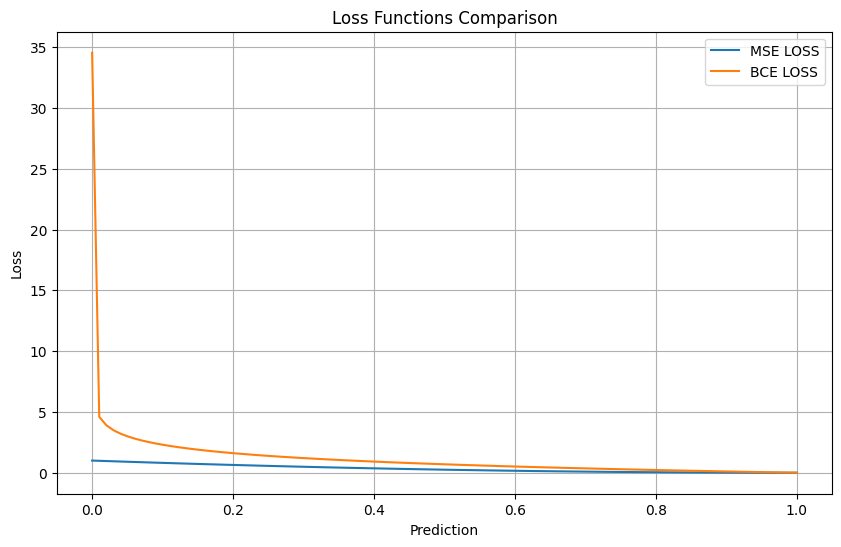

In [17]:
import matplotlib.pyplot as plt
# define predictions and true labels
predictions  = np.linspace(0,1,100)
true_label = 1

# compute losses
mse_losses = [(true_label - p)**2 for p in predictions]
bce_losses = [-true_label * np.log(max(p,1e-15)) - (1 - true_label) * np.log(max(1-p,1e-15)) for p in predictions]

# plot 
plt.figure(figsize=(10,6))
plt.plot(predictions,mse_losses, label="MSE LOSS")
plt.plot(predictions,bce_losses, label="BCE LOSS")
plt.title("Loss Functions Comparison")
plt.xlabel("Prediction")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()
